In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical 
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train=pd.read_csv('train.csv')

In [3]:
X=train.drop('label',axis=1).values.reshape(len(train),28,28,1)/255.
y=train.label.values

In [4]:
# check data distribution (it looks like the label is uniformly distributed)
value,count_num=np.unique(y,return_counts=True)

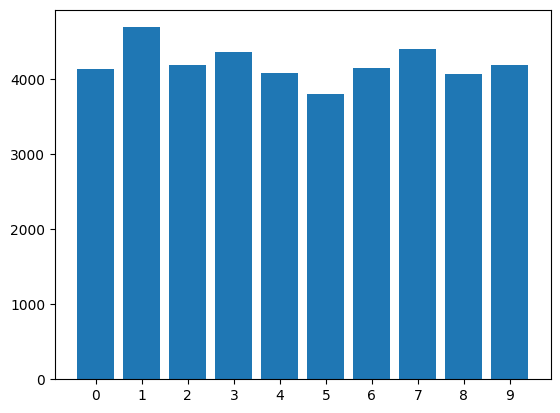

In [5]:
plt.bar(x=value,height=count_num)
plt.xticks(np.arange(min(value), max(value)+1, 1.0))
plt.show()

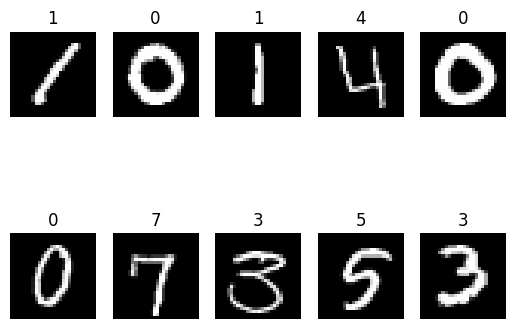

In [6]:
k=1
while k<11:
    plt.subplot(2,5,k)
    plt.imshow(X[k-1],cmap='grey')
    plt.title(y[k-1])
    plt.axis('off')
    k+=1

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X_train=X_train.repeat(3,-1)
X_train=tf.convert_to_tensor(X_train)
X_valid=X_valid.repeat(3,-1)
X_valid=tf.convert_to_tensor(X_valid)
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)

In [9]:
# Feature extraction (freeze all the layers)
base_model=tf.keras.applications.resnet50.ResNet50(include_top=False)
base_model.trainable=False
inputs=tf.keras.layers.Input(shape=(28,28,3),name='input_layer')
x=base_model(inputs)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2D')(x)
outputs=tf.keras.layers.Dense(10,activation='softmax')(x)
model_0=tf.keras.Model(inputs,outputs)

In [10]:
model_0.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [11]:
model_0.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 28, 28, 3)]       0         
_________________________________________________________________
resnet50 (Functional)        (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling_2D (G (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                20490     
Total params: 23,608,202
Trainable params: 20,490
Non-trainable params: 23,587,712
_________________________________________________________________


In [12]:
earlystop=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=5)

In [13]:
initial_epoch=10

In [14]:
history=model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),epochs=initial_epoch,callbacks=[earlystop])

Epoch 1/10
919/919 [==============================] - 17s 12ms/step - loss: 1.1153 - accuracy: 0.7101 - val_loss: 0.7277 - val_accuracy: 0.8098
Epoch 2/10
919/919 [==============================] - 11s 12ms/step - loss: 0.6474 - accuracy: 0.8222 - val_loss: 0.5712 - val_accuracy: 0.8393
Epoch 3/10
919/919 [==============================] - 11s 12ms/step - loss: 0.5346 - accuracy: 0.8486 - val_loss: 0.5034 - val_accuracy: 0.8537
Epoch 4/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4723 - accuracy: 0.8660 - val_loss: 0.4578 - val_accuracy: 0.8689
Epoch 5/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4310 - accuracy: 0.8769 - val_loss: 0.4206 - val_accuracy: 0.8775
Epoch 6/10
919/919 [==============================] - 10s 11ms/step - loss: 0.4033 - accuracy: 0.8830 - val_loss: 0.3965 - val_accuracy: 0.8800
Epoch 7/10
919/919 [==============================] - 10s 11ms/step - loss: 0.3802 - accuracy: 0.8897 - val_loss: 0.3726 - val_accuracy:

<Axes: >

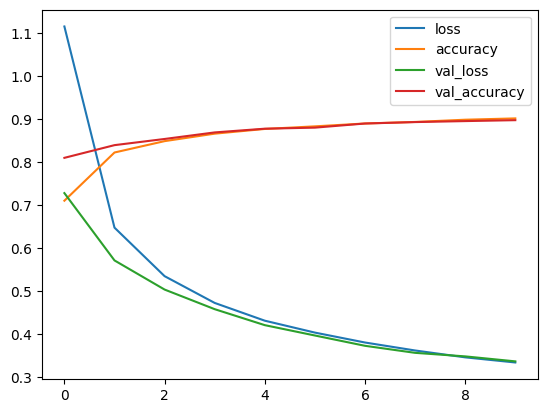

In [17]:
pd.DataFrame(history.history).plot()

In [20]:
# fine tuning
model_0.layers

In [21]:
model_0.layers[1].trainable=False
for layer in model_0.layers[1].layers[-10:]:
    layer.trainable=True

In [28]:
for layer_num,layer in enumerate(model_0.layers[1].layers):
    print(f'Layer {layer_num}: {layer.trainable}')

Layer 0: False
Layer 1: False
Layer 2: False
Layer 3: False
Layer 4: False
Layer 5: False
Layer 6: False
Layer 7: False
Layer 8: False
Layer 9: False
Layer 10: False
Layer 11: False
Layer 12: False
Layer 13: False
Layer 14: False
Layer 15: False
Layer 16: False
Layer 17: False
Layer 18: False
Layer 19: False
Layer 20: False
Layer 21: False
Layer 22: False
Layer 23: False
Layer 24: False
Layer 25: False
Layer 26: False
Layer 27: False
Layer 28: False
Layer 29: False
Layer 30: False
Layer 31: False
Layer 32: False
Layer 33: False
Layer 34: False
Layer 35: False
Layer 36: False
Layer 37: False
Layer 38: False
Layer 39: False
Layer 40: False
Layer 41: False
Layer 42: False
Layer 43: False
Layer 44: False
Layer 45: False
Layer 46: False
Layer 47: False
Layer 48: False
Layer 49: False
Layer 50: False
Layer 51: False
Layer 52: False
Layer 53: False
Layer 54: False
Layer 55: False
Layer 56: False
Layer 57: False
Layer 58: False
Layer 59: False
Layer 60: False
Layer 61: False
Layer 62: False
La

In [34]:
fine_tune_epoch=40
total_epochs=initial_epoch + fine_tune_epoch

In [35]:
# Fine tuning
model_0.fit(x=X_train,y=y_train,validation_data=(X_valid,y_valid),initial_epoch=history.epoch[-1],epochs=fine_tune_epoch,callbacks=[earlystop])

Epoch 10/40
919/919 [==============================] - 11s 11ms/step - loss: 0.3233 - accuracy: 0.9053 - val_loss: 0.3265 - val_accuracy: 0.9017
Epoch 11/40
919/919 [==============================] - 10s 11ms/step - loss: 0.3137 - accuracy: 0.9071 - val_loss: 0.3149 - val_accuracy: 0.9040
Epoch 12/40
919/919 [==============================] - 11s 12ms/step - loss: 0.3047 - accuracy: 0.9098 - val_loss: 0.3135 - val_accuracy: 0.9048
Epoch 13/40
919/919 [==============================] - 12s 13ms/step - loss: 0.2991 - accuracy: 0.9108 - val_loss: 0.3072 - val_accuracy: 0.9073
Epoch 14/40
919/919 [==============================] - 11s 12ms/step - loss: 0.2910 - accuracy: 0.9129 - val_loss: 0.2997 - val_accuracy: 0.9086
Epoch 15/40
919/919 [==============================] - 12s 13ms/step - loss: 0.2863 - accuracy: 0.9146 - val_loss: 0.2937 - val_accuracy: 0.9098
Epoch 16/40
919/919 [==============================] - 11s 12ms/step - loss: 0.2799 - accuracy: 0.9157 - val_loss: 0.2904 - val_ac

<Axes: >

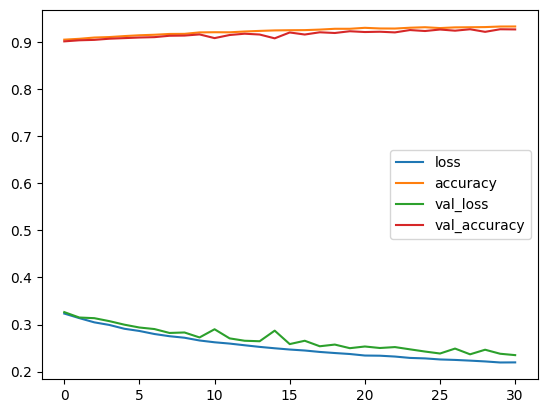

In [38]:
pd.DataFrame(model_0.history.history).plot()

In [39]:
y_pred=model_0.predict(X_valid)
y_pred=np.argmax(y_pred,axis=1)

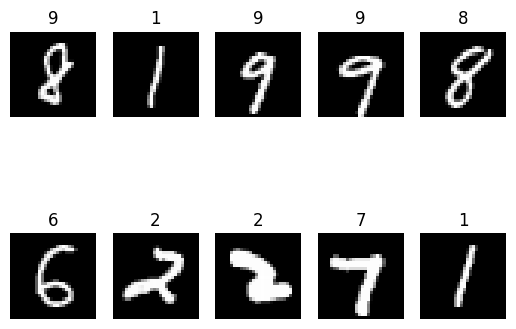

In [45]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_valid[i])
    plt.axis('off')
    plt.title(y_pred[i])

In [46]:
y_valid=np.argmax(y_valid,axis=1)

In [47]:
conf_mat=confusion_matrix(y_valid, y_pred)

In [48]:
conf_mat

array([[1161,    0,    8,    1,    2,   12,    7,    0,    8,    1],
       [   2, 1365,    5,    1,    5,    1,    4,    3,    2,    1],
       [  14,    4, 1144,   51,    4,   18,    3,   21,   30,    5],
       [   2,    0,   33, 1235,    1,   33,    3,   17,   15,   16],
       [   1,    1,    5,    0, 1166,    1,   10,    6,    7,   25],
       [   5,    0,   10,   53,    5,  963,   21,    9,   11,    8],
       [   6,    2,    2,    3,    5,    3, 1228,    0,    7,    0],
       [   1,    4,   10,    9,   18,    3,    0, 1285,    4,   25],
       [  15,    1,   25,   46,   26,   46,   17,    7,  988,   38],
       [   9,    0,    2,   10,   23,   11,    0,   16,   14, 1146]],
      dtype=int64)

<Axes: >

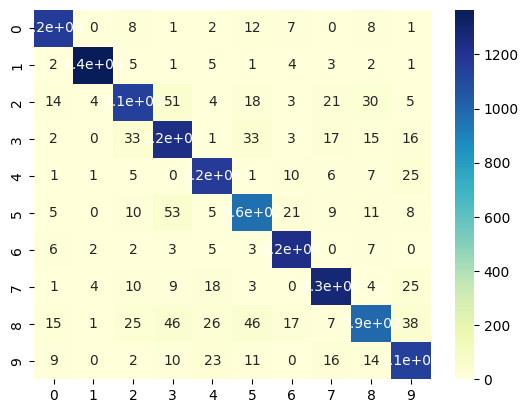

In [49]:
sns.heatmap(conf_mat,annot=True,cmap='YlGnBu')

In [52]:
test=pd.read_csv('test.csv')
test=test.values.reshape(len(test),28,28,1)/255.

In [53]:
test=test.repeat(3,-1)

In [54]:
y_pred=model_0.predict(test)

In [55]:
y_pred.shape

(28000, 10)

In [56]:
y_pred=np.argmax(y_pred,axis=1)

In [57]:
submit=pd.read_csv('sample_submission.csv')

In [58]:
submit.Label=y_pred

In [59]:
submit.to_csv('sample_submission.csv',index=False)